In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define transforms (basic normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
print("Loading MNIST dataset...")
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def split_dataset_by_digits(dataset, digits_0_to_8=True):
    """
    Split dataset based on digit labels
    
    Args:
        dataset: MNIST dataset
        digits_0_to_8: If True, return indices for digits 0-8, else return indices for digit 9
    
    Returns:
        List of indices for the specified digits
    """
    indices = []
    
    for idx, (_, label) in enumerate(dataset):
        if digits_0_to_8:
            if label <= 8:  # Digits 0-8
                indices.append(idx)
        else:
            if label == 9:  # Only digit 9
                indices.append(idx)
    
    return indices

# Split training dataset
print("Splitting training dataset...")
train_indices_0_to_8 = split_dataset_by_digits(train_dataset, digits_0_to_8=True)
train_indices_9 = split_dataset_by_digits(train_dataset, digits_0_to_8=False)

# Split test dataset
print("Splitting test dataset...")
test_indices_0_to_8 = split_dataset_by_digits(test_dataset, digits_0_to_8=True)
test_indices_9 = split_dataset_by_digits(test_dataset, digits_0_to_8=False)

# Create subset datasets
train_dataset_0_to_8 = Subset(train_dataset, train_indices_0_to_8)
train_dataset_9 = Subset(train_dataset, train_indices_9)

test_dataset_0_to_8 = Subset(test_dataset, test_indices_0_to_8)
test_dataset_9 = Subset(test_dataset, test_indices_9)

# Print statistics
print(f"\nDataset Statistics:")
print(f"Original training dataset size: {len(train_dataset)}")
print(f"Training dataset (digits 0-8): {len(train_dataset_0_to_8)}")
print(f"Training dataset (digit 9): {len(train_dataset_9)}")

print(f"\nOriginal test dataset size: {len(test_dataset)}")
print(f"Test dataset (digits 0-8): {len(test_dataset_0_to_8)}")
print(f"Test dataset (digit 9): {len(test_dataset_9)}")

# Verify the split by checking some labels
def verify_split(dataset, dataset_name, expected_labels):
    """Verify that the dataset contains only expected labels"""
    print(f"\nVerifying {dataset_name}...")
    labels = []
    for i in range(min(100, len(dataset))):  # Check first 100 samples
        _, label = dataset[i]
        labels.append(label)
    
    unique_labels = set(labels)
    print(f"Unique labels found: {sorted(unique_labels)}")
    
    if expected_labels == "0-8":
        assert all(label <= 8 for label in unique_labels), f"Found unexpected labels in {dataset_name}"
        print("✓ All labels are between 0-8")
    elif expected_labels == "9":
        assert all(label == 9 for label in unique_labels), f"Found unexpected labels in {dataset_name}"
        print("✓ All labels are 9")

# Verify the splits
verify_split(train_dataset_0_to_8, "Training dataset (0-8)", "0-8")
verify_split(train_dataset_9, "Training dataset (9)", "9")
verify_split(test_dataset_0_to_8, "Test dataset (0-8)", "0-8")
verify_split(test_dataset_9, "Test dataset (9)", "9")

# Create data loaders if needed
batch_size = 64

train_loader_0_to_8 = DataLoader(train_dataset_0_to_8, batch_size=batch_size, shuffle=True)
train_loader_9 = DataLoader(train_dataset_9, batch_size=batch_size, shuffle=True)

test_loader_0_to_8 = DataLoader(test_dataset_0_to_8, batch_size=batch_size, shuffle=False)
test_loader_9 = DataLoader(test_dataset_9, batch_size=batch_size, shuffle=False)

print(f"\nData loaders created with batch size: {batch_size}")
print(f"Train loader (0-8) batches: {len(train_loader_0_to_8)}")
print(f"Train loader (9) batches: {len(train_loader_9)}")
print(f"Test loader (0-8) batches: {len(test_loader_0_to_8)}")
print(f"Test loader (9) batches: {len(test_loader_9)}")

# Optional: Visualize some samples from each dataset
import matplotlib.pyplot as plt

def visualize_samples(dataset, title, num_samples=5):
    """Visualize samples from the dataset"""
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))
    fig.suptitle(title)
    
    for i in range(num_samples):
        if i < len(dataset):
            image, label = dataset[i]
            # Denormalize for visualization
            image = image.squeeze() * 0.3081 + 0.1307
            
            axes[i].imshow(image, cmap='gray')
            axes[i].set_title(f'Label: {label}')
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Uncomment to visualize samples
# visualize_samples(train_dataset_0_to_8, "Training Samples (Digits 0-8)")
# visualize_samples(train_dataset_9, "Training Samples (Digit 9)")

print("\n✅ Dataset splitting completed successfully!")
print("\nYou now have:")
print("- train_dataset_0_to_8: Training data with digits 0-8")
print("- train_dataset_9: Training data with digit 9 only")
print("- test_dataset_0_to_8: Test data with digits 0-8")
print("- test_dataset_9: Test data with digit 9 only")
print("- Corresponding DataLoaders for each dataset")

Loading MNIST dataset...
Splitting training dataset...
Splitting test dataset...

Dataset Statistics:
Original training dataset size: 60000
Training dataset (digits 0-8): 54051
Training dataset (digit 9): 5949

Original test dataset size: 10000
Test dataset (digits 0-8): 8991
Test dataset (digit 9): 1009

Verifying Training dataset (0-8)...
Unique labels found: [0, 1, 2, 3, 4, 5, 6, 7, 8]
✓ All labels are between 0-8

Verifying Training dataset (9)...
Unique labels found: [9]
✓ All labels are 9

Verifying Test dataset (0-8)...
Unique labels found: [0, 1, 2, 3, 4, 5, 6, 7, 8]
✓ All labels are between 0-8

Verifying Test dataset (9)...
Unique labels found: [9]
✓ All labels are 9

Data loaders created with batch size: 64
Train loader (0-8) batches: 845
Train loader (9) batches: 93
Test loader (0-8) batches: 141
Test loader (9) batches: 16

✅ Dataset splitting completed successfully!

You now have:
- train_dataset_0_to_8: Training data with digits 0-8
- train_dataset_9: Training data with 

Label: 5
Image shape: torch.Size([1, 28, 28])


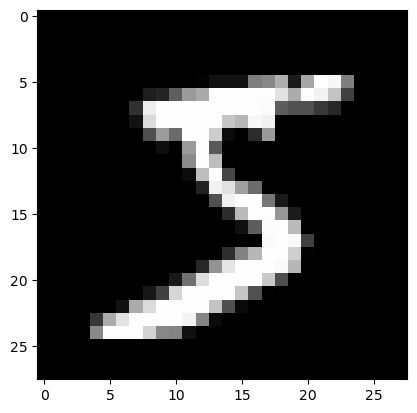

In [2]:
image,label=next(iter(train_dataset_0_to_8))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import random
import numpy as np
from PIL import Image
import pandas as pd
import os 
import matplotlib.pyplot as plt
import math
import random
import torch.nn.functional as F

In [4]:
class Linear:
    def __init__(self,fan_in,fan_out,bias=True):
        self.weights=torch.randn((fan_in,fan_out))/(fan_in**0.5)
        self.bias=torch.zeros(fan_out) if bias else None 
        self.out = None
        
    def __call__(self,x):
        self.out=x @ self.weights 
        if self.bias is not None:
            self.out+=self.bias
        return  self.out
        
    def parameters(self):
        return [self.weights]+ ([] if self.bias is None else [self.bias])

class BatchNorm1d_wavenet:
    def __init__(self,dim,eps=1e-5,momentum=0.1):
        self.eps=eps
        self.momentum=momentum
        self.training=True
        # paramameters for scale and shift
        self.gamma=torch.ones(dim)
        self.beta=torch.zeros(dim)
        # buffers
        self.running_mean=torch.zeros(dim)
        self.running_var=torch.ones(dim)

    def __call__(self,x):
        if self.training:
            if x.ndim==2:
                dim=0
            elif x.ndim==3:
                dim=(0,1)
            xmean=x.mean(dim,keepdim=True)
            xvar=x.var(dim,keepdim=True)
        else:
            xmean=self.running_mean
            xvar=self.running_var
        xnorm=(x-xmean)/torch.sqrt(xvar+self.eps)
        self.out=self.gamma*xnorm+self.beta
        # update buffers
        if self.training:
            with torch.no_grad():
                self.running_mean=(1-self.momentum)*self.running_mean + self.momentum*xmean
                self.running_var=(1-self.momentum)*self.running_var+self.momentum*xvar
                
        return self.out

class BatchNorm1d:
    def __init__(self,dim,eps=1e-5,momentum=0.1):
        self.eps=eps
        self.momentum=momentum
        self.training=True
        # paramameters for scale and shift
        self.gamma=torch.ones(dim)
        self.beta=torch.zeros(dim)
        # buffers
        self.running_mean=torch.zeros(dim)
        self.running_var=torch.ones(dim)

    def __call__(self,x):
        if self.training:
            xmean=x.mean(0,keepdim=True)
            xvar=x.var(0,keepdim=True)
        else:
            xmean=self.running_mean
            xvar=self.running_var
        xnorm=(x-xmean)/torch.sqrt(xvar+self.eps)
        self.out=self.gamma*xnorm+self.beta
        # update buffers
        if self.training:
            with torch.no_grad():
                self.running_mean=(1-self.momentum)*self.running_mean + self.momentum*xmean
                self.running_var=(1-self.momentum)*self.running_var+self.momentum*xvar
                
        return self.out
        
    def parameters(self):
        return [self.gamma,self.beta]

class LayerNorm1d:
    def __init__(self,dim,eps=1e-5):
        self.eps=eps
        # paramameters for scale and shift
        self.gamma=torch.ones(dim)
        self.beta=torch.zeros(dim)
        
    def __call__(self,x):

        xmean=x.mean(1,keepdim=True)
        xvar=x.var(1,keepdim=True)
        xnorm=(x-xmean)/torch.sqrt(xvar+self.eps)
        self.out=self.gamma*xnorm+self.beta
                
        return self.out
        
    def parameters(self):
        return [self.gamma,self.beta]
        

class Tanh:
    def __call__(self,x):
        self.out=torch.tanh(x)
        return self.out
    def parameters(self):
        return []


class Relu:
    def __call__(self,x):
        self.out=F.relu(x)
        return self.out
    def parameters(self):
        return []


class Sigmoid:
    def __call__(self,x):
        self.out=torch.sigmoid(x)
        return self.out
    def parameters(self):
        return []

        
class Embeddings:
    def __init__(self,num_embeds,emb_dim):
        self.emb_weights=torch.randn((num_embeds,emb_dim))

    def __call__(self,idx):
        self.out=self.emb_weights[idx]
        return self.out

    def parameters(self):
        return [self.emb_weights]

class FlattenConsecutive_wavenet:
    def __init__(self,n):
        self.n=n
        
    def __call__(self,x):
        B,T,C=x.shape
        x=x.view(B,T//self.n,C*self.n)
        if x.shape[1]==1:
            x=x.squeeze(1)
        self.out=x
        return self.out

    def parameters(self):
        return []

class Flatten:
    def __call__(self,x):
        self.out=x.view(x.shape[0],-1)
        return self.out

    def parameters(self):
        return []
    

class Sequential:
    def __init__(self,layers):
        self.layers=layers

    def __call__(self,x):
        for layer in self.layers:
            x=layer(x)
        self.out=x
        return self.out

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [5]:
def plot_activations(model,activation):

    
    if activation=='Tanh':
        plt.figure(figsize=(20,4))
        legends=[]
        for i, layer in enumerate(model.layers[:-1]):
            if isinstance(layer,Tanh):
                t=layer.out
                print('layer %d (%10s): mean %+.2f, std %.2f, saturated:%.2f%%' % (i,layer.__class__.__name__, t.mean(),t.std(),(t.abs()>0.97).float().mean()*100))
                hy,hx=torch.histogram(t,density=True)
                plt.plot(hx[:-1].detach(),hy.detach())
                legends.append(f'layer {i} ({layer.__class__.__name__}')
        plt.legend(legends)
        plt.title('activation distribution');


    if activation=='Relu':
        plt.figure(figsize=(20,4))
        legends=[]
        for i, layer in enumerate(model.layers[:-1]):
            if isinstance(layer,Tanh):
                t=layer.out
                print('layer %d (%10s): mean %+.2f, std %.2f, saturated:%.2f%%' % (i,layer.__class__.__name__, t.mean(),t.std(),((t<=0).float().mean()*100)))
                hy,hx=torch.histogram(t,density=True)
                plt.plot(hx[:-1].detach(),hy.detach())
                legends.append(f'layer {i} ({layer.__class__.__name__}')
        plt.legend(legends)
        plt.title('activation distribution');

    if activation=='Sigmoid':
        plt.figure(figsize=(20,4))
        legends=[]
        for i, layer in enumerate(model.layers[:-1]):
            if isinstance(layer,Sigmoid):
                t=layer.out
                print('layer %d (%10s): mean %+.2f, std %.2f, saturated:%.2f%%' % (i,layer.__class__.__name__, t.mean(),t.std(),((t.abs()>0.97)|(t.abs()<0.03)).float().mean()*100))
                hy,hx=torch.histogram(t,density=True)
                plt.plot(hx[:-1].detach(),hy.detach())
                legends.append(f'layer {i} ({layer.__class__.__name__}')
        plt.legend(legends)
        plt.title('activation distribution');
# thus we get low saturation as we go deeper in the layers 



def plot_pre_activations(model_):
    plt.figure(figsize=(20,4))
    legends=[]
    for i, layer in enumerate(model_.layers[:-1]):
        if isinstance(layer,Linear):
            t=layer.out
            print('layer %d (%10s): mean %+.2f, std %.2f' % (i,layer.__class__.__name__, t.mean(),t.std()))
            hy,hx=torch.histogram(t,density=True)
            plt.plot(hx[:-1].detach(),hy.detach())
            legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends)
    plt.title('pre-activation distribution');
# thus all pre activations have a simillar distribution indicating good training

def plot_logits_distribution(model_):
    l= model_.layers[-1].out  
    hy, hx = torch.histogram(l, density=True)  # Compute histogram
    bin_centers = (hx[:-1] + hx[1:]) 
    # Plot the histogram
    plt.subplot(2,1,1)
    plt.plot(bin_centers.detach(), hy.detach())
    plt.xlabel('logit Values')
    plt.ylabel('Density')
    plt.title('logit Distribution of Last Layer')
    plt.show()
    print(bin_centers.detach().std())
    
    l=model_.layers[-1].out.grad
    hy, hx = torch.histogram(l, density=True)  # Compute histogram
    bin_centers = (hx[:-1] + hx[1:]) 
    # Plot the histogram
    plt.plot(2,1,2)
    plt.plot(bin_centers.detach(),hy.detach());
    plt.xlabel(' gradients')
    plt.ylabel(' freaquency')
    plt.title('gradient Distribution of Last Layer')
    plt.show()


def neuron_activations(model_,activation):
    if activation=='Relu':
        for i in range(11):
            l = model_.layers[i].out
            plt.imshow(l.abs()<=0, cmap='gray',interpolation='nearest');
            print(f'saturation%:{((l.abs()>0).float().mean()*100)}')
            plt.title(f'neuron activation map of {i}th layer')
            plt.show()

    if activation=='Tanh':
        for i in range(11):
            l = model_.layers[i].out
            if isinstance(model_.layers[i],Tanh):
                plt.imshow(l.abs()>0.99, cmap='gray',interpolation='nearest')
                
                print(f'saturation%:{((l.abs()>0.97).float().mean()*100)}')
                plt.title(f'neuron activation map of {i}th layer')
                plt.show()

    if  activation=='Sigmoid':
     for i in range(11):
        l = model_.layers[i].out
        if isinstance(model_.layers[i],Tanh):
            plt.imshow((l.abs()>0.99) | (l.abs()<0.03), cmap='gray',interpolation='nearest')
            
            print(f'saturation%:{((l.abs()>0.99) | (l.abs()<0.03).float().mean()*100)}')
            plt.title(f'neuron activation map of {i}th layer')
            plt.show()
         

def plot_activation_gradients(model_,activation):
    plt.figure(figsize=(20,4))
    legends=[]
    for i, layer in enumerate(model_.layers[:-1]):
        if isinstance(layer,activation):
            t=layer.out.grad
            print('layer %d (%10s): mean %+.2f, std %.2f' % (i,layer.__class__.__name__, t.mean(),t.std()))
            hy,hx=torch.histogram(t,density=True)
            plt.plot(hx[:-1].detach(),hy.detach())
            legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends)
    plt.title('gradient distribution');


def plot_weights_grads(model_):
    plt.figure(figsize=(20,7))
    legends=[]
    for i, layer in enumerate(model_.layers):
            for p in layer.parameters():
                t=p.grad
                if p.ndim==2:
                    print('weights (%10s): mean %+f, std %e, grad:data ratio %e' % (tuple(p.shape), t.mean(),t.std(),t.std()/p.std()))
                    hy,hx=torch.histogram(t,density=True)
                    plt.subplot(2,1,1)
                    plt.plot(hx[:-1].detach(),hy.detach())
                    legends.append(f'layer{i} ({layer.__class__.__name__}) ')
    plt.legend(legends)
    plt.title('weight gradient distribution');

In [6]:
# hyperparameters 
batch_size=64
n_c=1
img_size=28
# batch_dim=2
h_units=100
l_dim=10
lossi=[]
steps=[]
lri=[]
lrex=[]
ud=[]

# model=Sequential([Embeddings(vocab_size,emb_space),
#     FlattenConsecutive(batch_dim),Linear(emb_space*2,h_units,bias=False),BatchNorm1d(h_units),Tanh(),
#     FlattenConsecutive(batch_dim),Linear(h_units*2,h_units,bias=False),BatchNorm1d(h_units),Tanh(),
#     FlattenConsecutive(batch_dim),Linear(h_units*2,h_units,bias=False),BatchNorm1d(h_units),Tanh(),
#     Linear(h_units,vocab_size)
# ])

model_A=Sequential([
    Linear(img_size*img_size,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,10),
])

model_B=Sequential([
    Linear(img_size*img_size,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,h_units,bias=False),LayerNorm1d(h_units),Relu(),
    Linear(h_units,img_size*img_size),
])


with torch.no_grad():
    model_A.layers[-1].weights*=0.1
    # layers[-1].gamma*=0.1  # making last layer less confident 
    # for layer in layers[:-1]:
    #     if isinstance(layer,Linear):
    #         layer.weights*=5/3

with torch.no_grad():
    model_B.layers[-1].weights*=0.1
    # layers[-1].gamma*=0.1  # making last layer less confident 
    # for layer in layers[:-1]:
    #     if isinstance(layer,Linear):
    #         layer.weights*=5/3

parameters= model_A.parameters()
for p in parameters:
    p.requires_grad=True


device='cuda' if torch.cuda.is_available() else 'cpu'
print('using device:',device)
model_A=model_A
model_B=model_B
print(sum(p.nelement() for p in parameters))


using device: cuda
110210


In [7]:
from tqdm.auto import tqdm 

In [8]:
epochs=10
for i in tqdm(range(epochs)):
    #minibatch construct
    for x,y in train_loader_0_to_8:
        logits=model_A(x.flatten(1))
        loss=F.cross_entropy(logits,y)
        #backward pass
        for layer in model_A.layers:
            layer.out.retain_grad()
        for p in parameters:
            p.grad=None
        loss.backward()
        
        lr=0.1 if i<150000 else 0.01
        for p in parameters:
                p.data+=-lr*p.grad

        # track stats
    if i%2==0:
        print(f'{i:7d}/{epochs:7d} : {loss.item():.4f}')
    steps.append(i)
    lossi.append(loss.log10().item())

    with torch.no_grad():
        ud.append([(lr*p.grad.std()/ p.data.std()).log10().item() for p in parameters])
        # # break
        # if i>9998:
        #     break

  0%|          | 0/10 [00:00<?, ?it/s]

      0/     10 : 0.1053
      2/     10 : 0.0816
      4/     10 : 0.0289
      6/     10 : 0.0106
      8/     10 : 0.0401


Label: 5
Image shape: torch.Size([1, 28, 28])


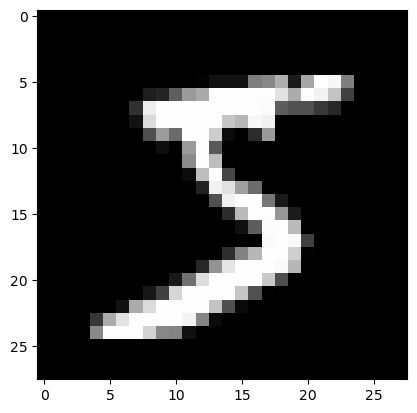

tensor([[-3.0648, -0.0710, -3.0033,  7.8915, -4.9941, 10.6086, -2.7131, -1.0033,
         -0.7192, -3.1990]])
tensor([5])


In [37]:
image,label=next(iter(train_dataset_0_to_8))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits=model_A(image.flatten(1))
    print(logits)
    print(logits.argmax(1))

Label: 7
Image shape: torch.Size([1, 28, 28])


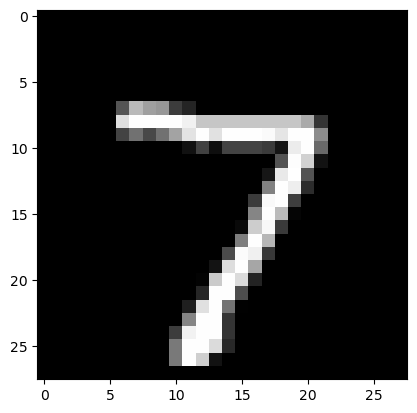

tensor([[-2.0706,  0.1614, -0.1942,  1.3994, -1.0576, -1.4249, -4.0401, 11.3221,
         -1.4254, -2.4301]])
tensor([7])


In [10]:
image,label=next(iter(test_dataset_0_to_8))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits=model_A(image.flatten(1))
    print(logits)
    print(logits.argmax(1))

In [19]:
epochs=10
parameters= model_B.parameters()
for p in parameters:
    p.requires_grad=True
for i in tqdm(range(epochs)):
    #minibatch construct
    for x,y in train_dataset_9:
        
        logits=model_B(x.flatten(1))
        loss=F.mse_loss(logits,x.flatten(1))
        #backward pass
        for layer in model_B.layers:
            layer.out.retain_grad()
        for p in parameters:
            p.grad=None
        loss.backward()
        
        lr=0.1 if i<150000 else 0.01
        for p in parameters:
                p.data+=-lr*p.grad

        # track stats
    if i%2==0:
        print(f'{i:7d}/{epochs:7d} : {loss.item():.4f}')
    steps.append(i)
    lossi.append(loss.log10().item())

    with torch.no_grad():
        ud.append([(lr*p.grad.std()/ p.data.std()).log10().item() for p in parameters])
        # # break
        # if i>9998:
        #     break

  0%|          | 0/10 [00:00<?, ?it/s]

      0/     10 : 0.1344
      2/     10 : 0.1096
      4/     10 : 0.0955
      6/     10 : 0.0882
      8/     10 : 0.0822


Label: 9
Image shape: torch.Size([1, 28, 28])


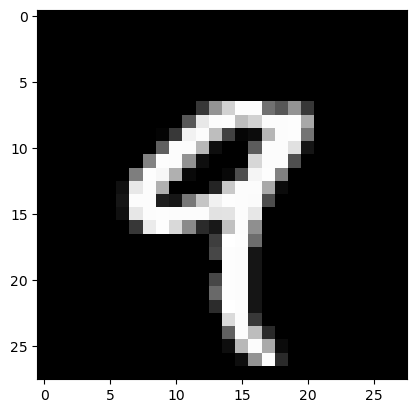

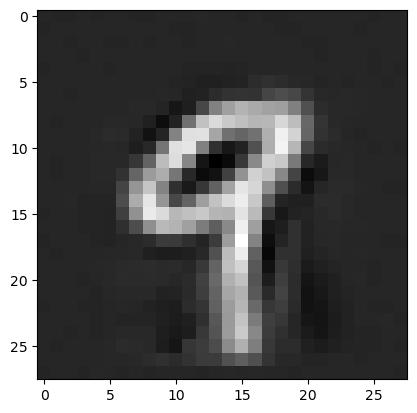

In [25]:
image,label=next(iter(train_dataset_9))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits=model_B(image.flatten(1))
    plt.imshow(logits.view(28,28),cmap='gray')
       
    

Label: 5
Image shape: torch.Size([1, 28, 28])


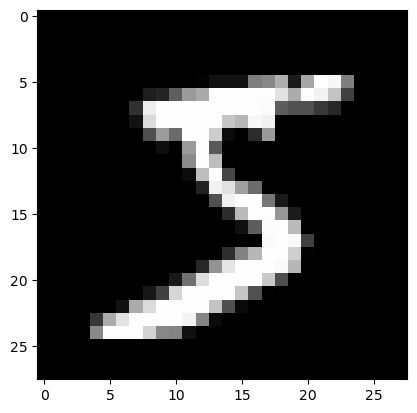

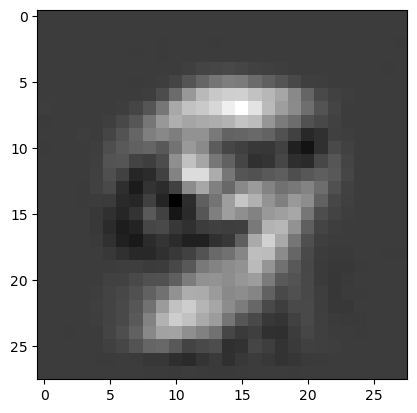

In [46]:
image,label=next(iter(train_dataset_0_to_8))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits=model_B(image.flatten(1))
    plt.imshow(logits.view(28,28),cmap='gray')
    

Label: 9
Image shape: torch.Size([1, 28, 28])


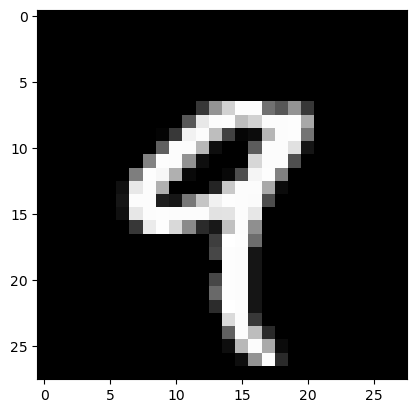

tensor([[-2.6812,  0.0921, -1.9443,  0.9322,  4.0920,  1.0309, -4.4814,  1.7705,
          4.8238, -3.5045]])
tensor([8])


In [42]:
image,label=next(iter(train_dataset_9))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits=model_A(image.flatten(1))
    print(logits)
    print(logits.argmax(1))
    

Model A activations 


layer 0 (    Linear): mean +0.14, std 2.72
layer 3 (    Linear): mean -0.04, std 0.65
layer 6 (    Linear): mean -0.02, std 0.81
layer 9 (    Linear): mean +0.04, std 0.63


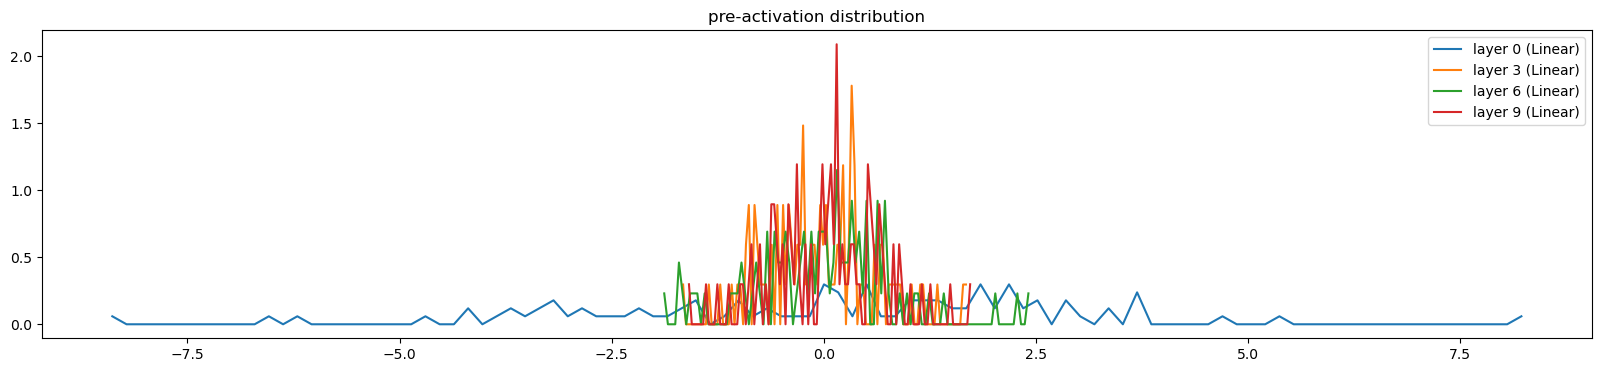

In [30]:
plot_pre_activations(model_A)

layer 2 (      Relu): mean +0.33, std 0.47, saturated:52.00%
layer 5 (      Relu): mean +0.38, std 0.60, saturated:52.00%
layer 8 (      Relu): mean +0.38, std 0.61, saturated:56.00%
layer 11 (      Relu): mean +0.45, std 0.63, saturated:51.00%


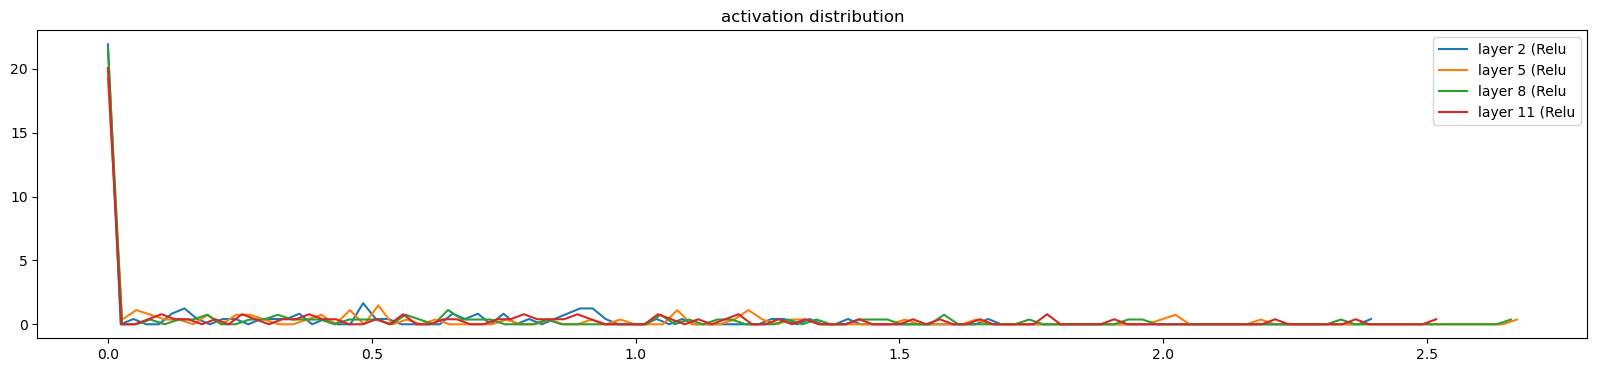

In [213]:
plt.figure(figsize=(20,4))
legends=[]
for i, layer in enumerate(model_A.layers[:-1]):
    if isinstance(layer,Relu):
        t=layer.out
        print('layer %d (%10s): mean %+.2f, std %.2f, saturated:%.2f%%' % (i,layer.__class__.__name__, t.mean(),t.std(),((t<=0).float().mean()*100)))
        hy,hx=torch.histogram(t,density=True)
        plt.plot(hx[:-1].detach(),hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends)
plt.title('activation distribution');

Model B activations 

layer 0 (    Linear): mean +0.16, std 3.95
layer 3 (    Linear): mean -0.01, std 1.46
layer 6 (    Linear): mean -0.11, std 1.25
layer 9 (    Linear): mean -0.03, std 0.72


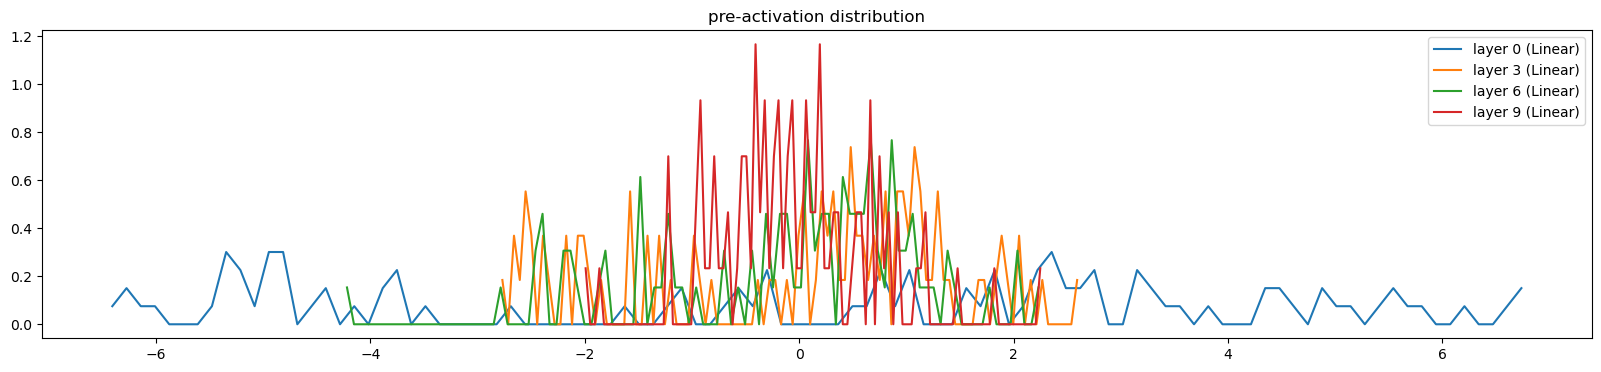

In [34]:
plot_pre_activations(model_B)

layer 2 (      Relu): mean +0.50, std 0.55, saturated:40.00%
layer 5 (      Relu): mean +0.47, std 0.50, saturated:36.00%
layer 8 (      Relu): mean +0.44, std 0.49, saturated:36.00%
layer 11 (      Relu): mean +0.80, std 1.13, saturated:46.00%


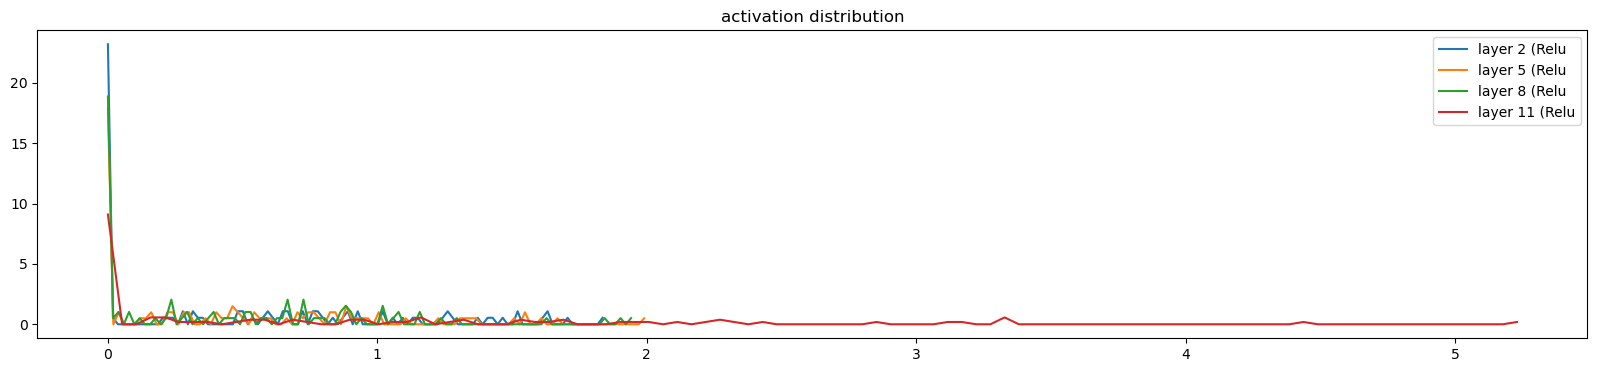

In [212]:
plt.figure(figsize=(20,4))
legends=[]
for i, layer in enumerate(model_B.layers[:-1]):
    if isinstance(layer,Relu):
        t=layer.out
        print('layer %d (%10s): mean %+.2f, std %.2f, saturated:%.2f%%' % (i,layer.__class__.__name__, t.mean(),t.std(),((t<=0).float().mean()*100)))
        hy,hx=torch.histogram(t,density=True)
        plt.plot(hx[:-1].detach(),hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends)
plt.title('activation distribution');

In [242]:
steered_norm_vecs=[]
for (layer_a,layer_b) in zip(model_A.layers[:-1],model_B.layers[:-1]):
    if isinstance(layer_a,Relu) and isinstance(layer_b,Relu):
        print(layer_a.out,layer_b.out)
        steered_vectors=layer_a.out.mean()-layer_b.out.mean()
        # normalized_steered_vectors=steered_vectors/steered_vectors.norm(dim=1,keepdim=True)
        steered_norm_vecs.append(steered_vectors)


tensor([[0.6204, 0.0000, 1.0188, 0.0000, 0.5607, 0.0000, 0.5992, 0.0000, 0.0000,
         0.1034, 0.7691, 0.1150, 0.2311, 0.5042, 0.0000, 0.0000, 0.5206, 0.0662,
         0.0000, 0.0000, 0.0000, 0.3886, 0.1225, 0.4446, 0.0000, 0.5306, 0.0000,
         0.0000, 0.0000, 0.6622, 0.1002, 0.1706, 0.0000, 0.6038, 0.0000, 0.3776,
         0.2685, 0.0000, 0.0000, 0.3749, 0.6374, 0.7415, 0.0030, 0.0000, 0.0000,
         0.2359, 0.0000, 0.0000, 0.0000, 0.0000, 0.0483, 0.0000, 0.0000, 0.7993,
         0.0000, 2.7136, 0.0000, 0.7493, 1.0044, 0.6157, 1.3346, 0.7295, 0.0000,
         0.0000, 0.5613, 0.0000, 0.0000, 0.7737, 0.4743, 0.6110, 1.0549, 0.0000,
         0.2965, 0.0000, 0.0000, 0.0000, 1.0820, 0.6093, 0.0000, 0.0000, 1.7302,
         0.0000, 0.9712, 0.0000, 0.0000, 1.7213, 0.9940, 0.8536, 0.0000, 0.0979,
         0.4466, 0.0000, 0.1230, 0.0000, 0.0000, 0.0000, 0.0000, 1.3442, 0.0000,
         0.0634]]) tensor([[0.0000, 0.0000, 0.5186, 0.0000, 0.0000, 0.8013, 0.0000, 0.0000, 0.0000,
         

layer 0 : mean -0.174058, std nan
layer 1 : mean -0.089728, std nan
layer 2 : mean -0.076510, std nan
layer 3 : mean -0.330566, std nan


C:\Users\shree\AppData\Local\Temp\ipykernel_14028\1668217488.py:4: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\ReduceOps.cpp:1823.)
  print(f'layer {i} : mean {t.mean():2f}, std {t.std():2f}')


Text(0.5, 1.0, 'steered vecotrs distribution')

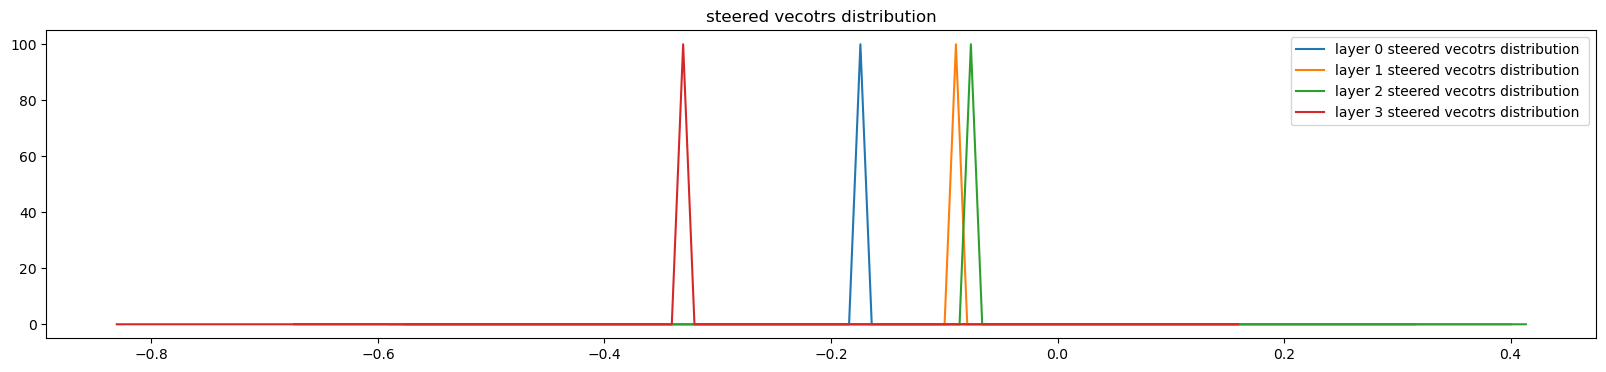

In [243]:
plt.figure(figsize=(20,4))
legends=[]
for i,t in enumerate(steered_norm_vecs):
        print(f'layer {i} : mean {t.mean():2f}, std {t.std():2f}')
        hy,hx=torch.histogram(t,density=True)
        plt.plot(hx[:-1].detach(),hy.detach())
        legends.append(f'layer {i} steered vecotrs distribution ')
plt.legend(legends)
plt.title('steered vecotrs distribution')

In [216]:
steered_norm_vecs

[tensor([[ 0.1326,  0.0332,  0.0489,  0.0000,  0.1090, -0.1021,  0.1146,  0.0000,
           0.0000, -0.0241, -0.0995,  0.0639, -0.0544, -0.1659, -0.1759, -0.0010,
          -0.0467, -0.1302,  0.0000,  0.0000, -0.1807, -0.0890, -0.0605,  0.0622,
           0.0000, -0.1279, -0.0367, -0.0848,  0.0000, -0.0649,  0.0478,  0.0675,
           0.0000,  0.1183, -0.1147, -0.0942, -0.1943, -0.0835, -0.1065,  0.0004,
          -0.1193,  0.0958, -0.0976, -0.0791, -0.2094,  0.0852,  0.0000,  0.0000,
          -0.1001, -0.0441, -0.0991, -0.1012, -0.0289, -0.0644, -0.0006,  0.1479,
           0.0000,  0.0952,  0.0790,  0.0881,  0.1279,  0.0630, -0.2095,  0.0000,
           0.1038,  0.0000,  0.0000, -0.0852,  0.0852,  0.1200,  0.1398, -0.2174,
          -0.0532,  0.0000, -0.0869, -0.0775,  0.0223,  0.1138,  0.0000,  0.0000,
          -0.0359, -0.1832,  0.1608, -0.1193, -0.1950,  0.0186,  0.0514,  0.1192,
           0.0394, -0.1408,  0.0920, -0.0853, -0.2362,  0.0293, -0.1306, -0.0467,
          -0.064

In [269]:
steered_activations=[]
control=1
c=0
for i,layer in enumerate(model_A.layers[:-1]):
    if isinstance(layer,Relu):
        steered_activations.append(layer.out+steered_norm_vecs[c]*control)
        c+=1
        print(c)

1
2
3
4


layer 0 : mean 0.151676, std 0.478977
layer 1 : mean 0.301459, std 0.551086
layer 2 : mean 0.303708, std 0.652304
layer 3 : mean 0.113542, std 0.658895


Text(0.5, 1.0, 'steered activations ')

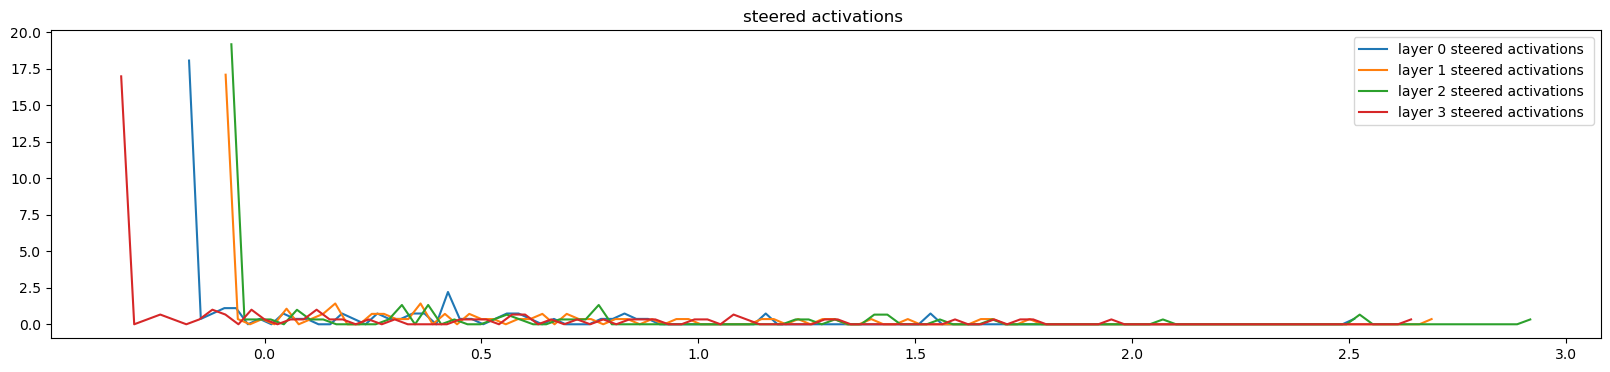

In [270]:
plt.figure(figsize=(20,4))
legends=[]
for i,t in enumerate(steered_activations):
        print(f'layer {i} : mean {t.mean():2f}, std {t.std():2f}')
        hy,hx=torch.histogram(t,density=True)
        plt.plot(hx[:-1].detach(),hy.detach())
        legends.append(f'layer {i} steered activations ')
plt.legend(legends)
plt.title('steered activations ')

Label: 9
Image shape: torch.Size([1, 28, 28])


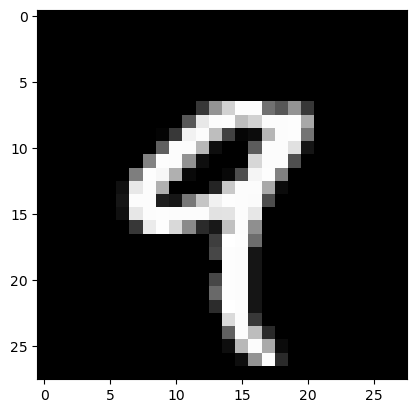

tensor([[ 1.6105, -2.0913, -1.5980, -2.2070,  3.4067,  1.6414,  0.7265, -1.5427,
          0.7291, -0.5038]])
tensor([4])


In [271]:
image,label=next(iter(train_dataset_9))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits_=model_A.layers[-1](steered_activations[3])
    print(logits_)
    print(logits_.argmax(1))
    

In [253]:
def steered_model(input,control):
    z1=model_A.layers[0](input)
    n1=model_A.layers[1](z1)
    a1=model_A.layers[2](n1)+steered_norm_vecs[0]*control
    z2=model_A.layers[3](a1)
    n2=model_A.layers[4](z2)
    a2=model_A.layers[5](n2)+steered_norm_vecs[1]*control
    z3=model_A.layers[6](a2)
    n3=model_A.layers[7](z3)
    a3=model_A.layers[8](n3)+steered_norm_vecs[2]*control
    z4=model_A.layers[9](a3)
    n4=model_A.layers[10](z4)
    a4=model_A.layers[11](n4)+steered_norm_vecs[3]*control
    logits=model_A.layers[12](a4)
    return logits


Label: 9
Image shape: torch.Size([1, 28, 28])


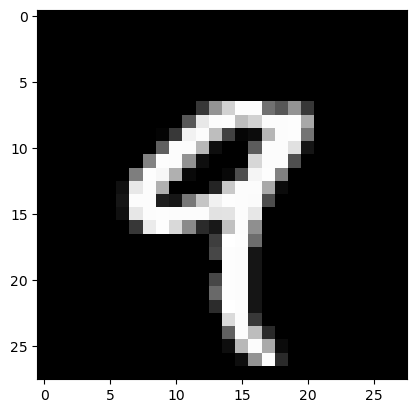

tensor([[ 3.2040, -5.4996, -4.5546, -5.3113,  5.3867, -3.1225,  3.0080, -4.2564,
         -1.6138, 13.1018]])
tensor([9])


In [273]:
image,label=next(iter(train_dataset_9))
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')
print(f'Label: {label}')
print(f'Image shape: {image.shape}')
plt.show()
with torch.no_grad():
    logits_=steered_model(image.flatten(1),control=10)
    print(logits_)
    print(logits_.argmax(1))

Thus I succesfully steered the model to learn n0. 9